In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

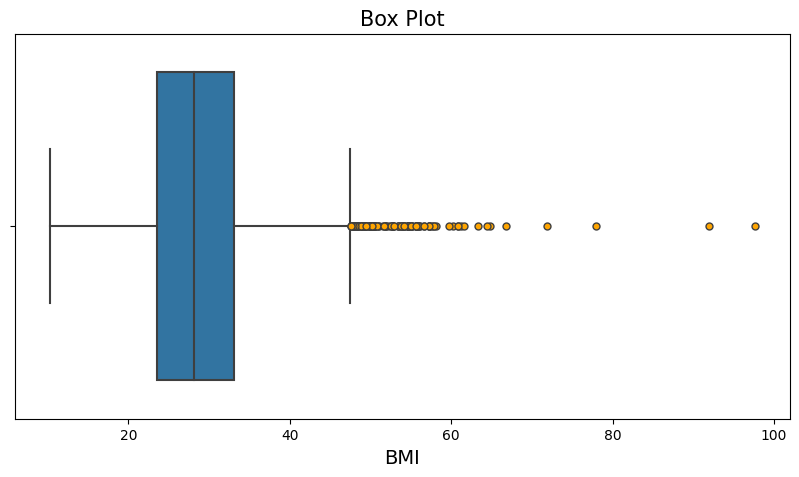

In [6]:
#Boxplot
df = pd.read_csv('stroke.csv')
fig = plt.figure(figsize=(10,5))
df.head(1)
sns.boxplot(x = df.bmi, flierprops = dict(markerfacecolor = 'orange', marker = 'o'))
plt.title('Box Plot', fontsize=15)
plt.xlabel('BMI', fontsize=14)
plt.show()

<ipython-input-7-37b81b1837e8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


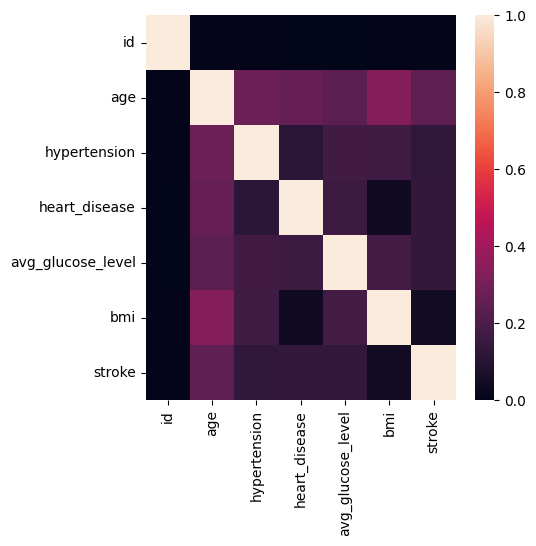

In [7]:
#Heatmap
df.head(10)
plt.figure(figsize = (5,5))
sns.heatmap(df.corr())
plt.show()

<ipython-input-8-f42a41116921>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr().iloc[2:,:2]


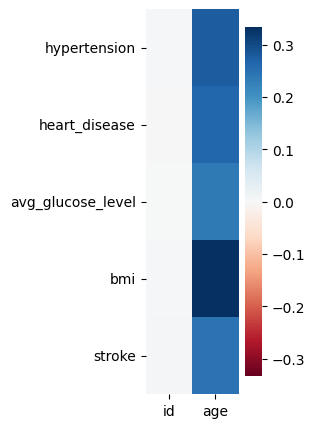

In [8]:
#Heatmap
plt.figure(figsize = (1.5,5))
correlations = df.corr().iloc[2:,:2]
maxcorr = correlations.abs().max().max()
sns.heatmap(correlations, cmap = 'RdBu', vmax = maxcorr, vmin = -maxcorr)
plt.show()

In [9]:
#Gender - (male = 0 / women = 1 / Other = 2)
df['gender'] = df['gender'].replace({'Male': 0, 'Female': 1, 'Other':2})

#ever_married (No = 0 / Yes = 1)
df['ever_married'] = df['ever_married'].replace({'No': 0, 'Yes': 1})

#Residence Type (Rural = 0 / Urban = 1)
df['Residence_type'] = df['Residence_type'].replace({'Rural': 0, 'Urban': 1})

#Work type ( "children = 0", "Govt_jov = 1", "Never_worked = 2", "Private = 3" or "Self-employed = 4")
df['work_type'] = df['Residence_type'].replace({'children': 0, 'Govt_jov': 1,'Never_worked':2,'Private':3 ,"Self-employed" : 4})

#smoking status (No = 0, Yes = 1)
df['smoking_status'] = df['Residence_type'].replace({'formerly smoked': 0, 'never smoked': 1})

#BMI
mean = df['bmi'].mean()
print(mean)
print(True if math.isnan(df['bmi'][1]) else False)
for i in range(len(df['bmi'])):
  if math.isnan(df['bmi'][i]):
    df.loc[i, 'bmi'] = mean

df.head(4)

28.893236911794666
True


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,1,1,228.69,36.600000,1,1
1,51676,1,61.0,0,0,1,0,0,202.21,28.893237,0,1
2,31112,0,80.0,0,1,1,0,0,105.92,32.500000,0,1
3,60182,1,49.0,0,0,1,1,1,171.23,34.400000,1,1


In [10]:
import random

filtered_df = df[df['stroke'] == 0]
#Randomly select 42 rows from the filtered dataset
random.seed(42)
selected_rows = filtered_df.sample(n=249)

#Combining of rows
remaining_rows = df[df['stroke'] != 0]
final_df = pd.concat([selected_rows, remaining_rows])

In [3]:
#Feeding into a model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [11]:
#Data Preprocessing
indices = final_df.index
shuffled_indices = np.random.permutation(indices)
df1 = final_df.loc[shuffled_indices]
X = df1.drop('stroke', axis=1)
y = df1['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')



Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.74      0.79        54
           1       0.74      0.85      0.79        46

    accuracy                           0.79       100
   macro avg       0.79      0.79      0.79       100
weighted avg       0.80      0.79      0.79       100



In [12]:
#Displays correlations of feature to the target variable
coefficients = model.coef_[0]
coefficient_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
print(coefficient_df)

              Feature  Coefficient
0                  id    -0.000006
1              gender    -0.349060
2                 age     0.060849
3        hypertension     0.335218
4       heart_disease     0.133478
5        ever_married    -0.019881
6           work_type    -0.307462
7      Residence_type    -0.307462
8   avg_glucose_level     0.001577
9                 bmi    -0.067926
10     smoking_status    -0.307462


In [13]:
#SVM Model
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86        54
           1       0.81      0.91      0.86        46

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.87      0.86      0.86       100



Accuracy: 0.74


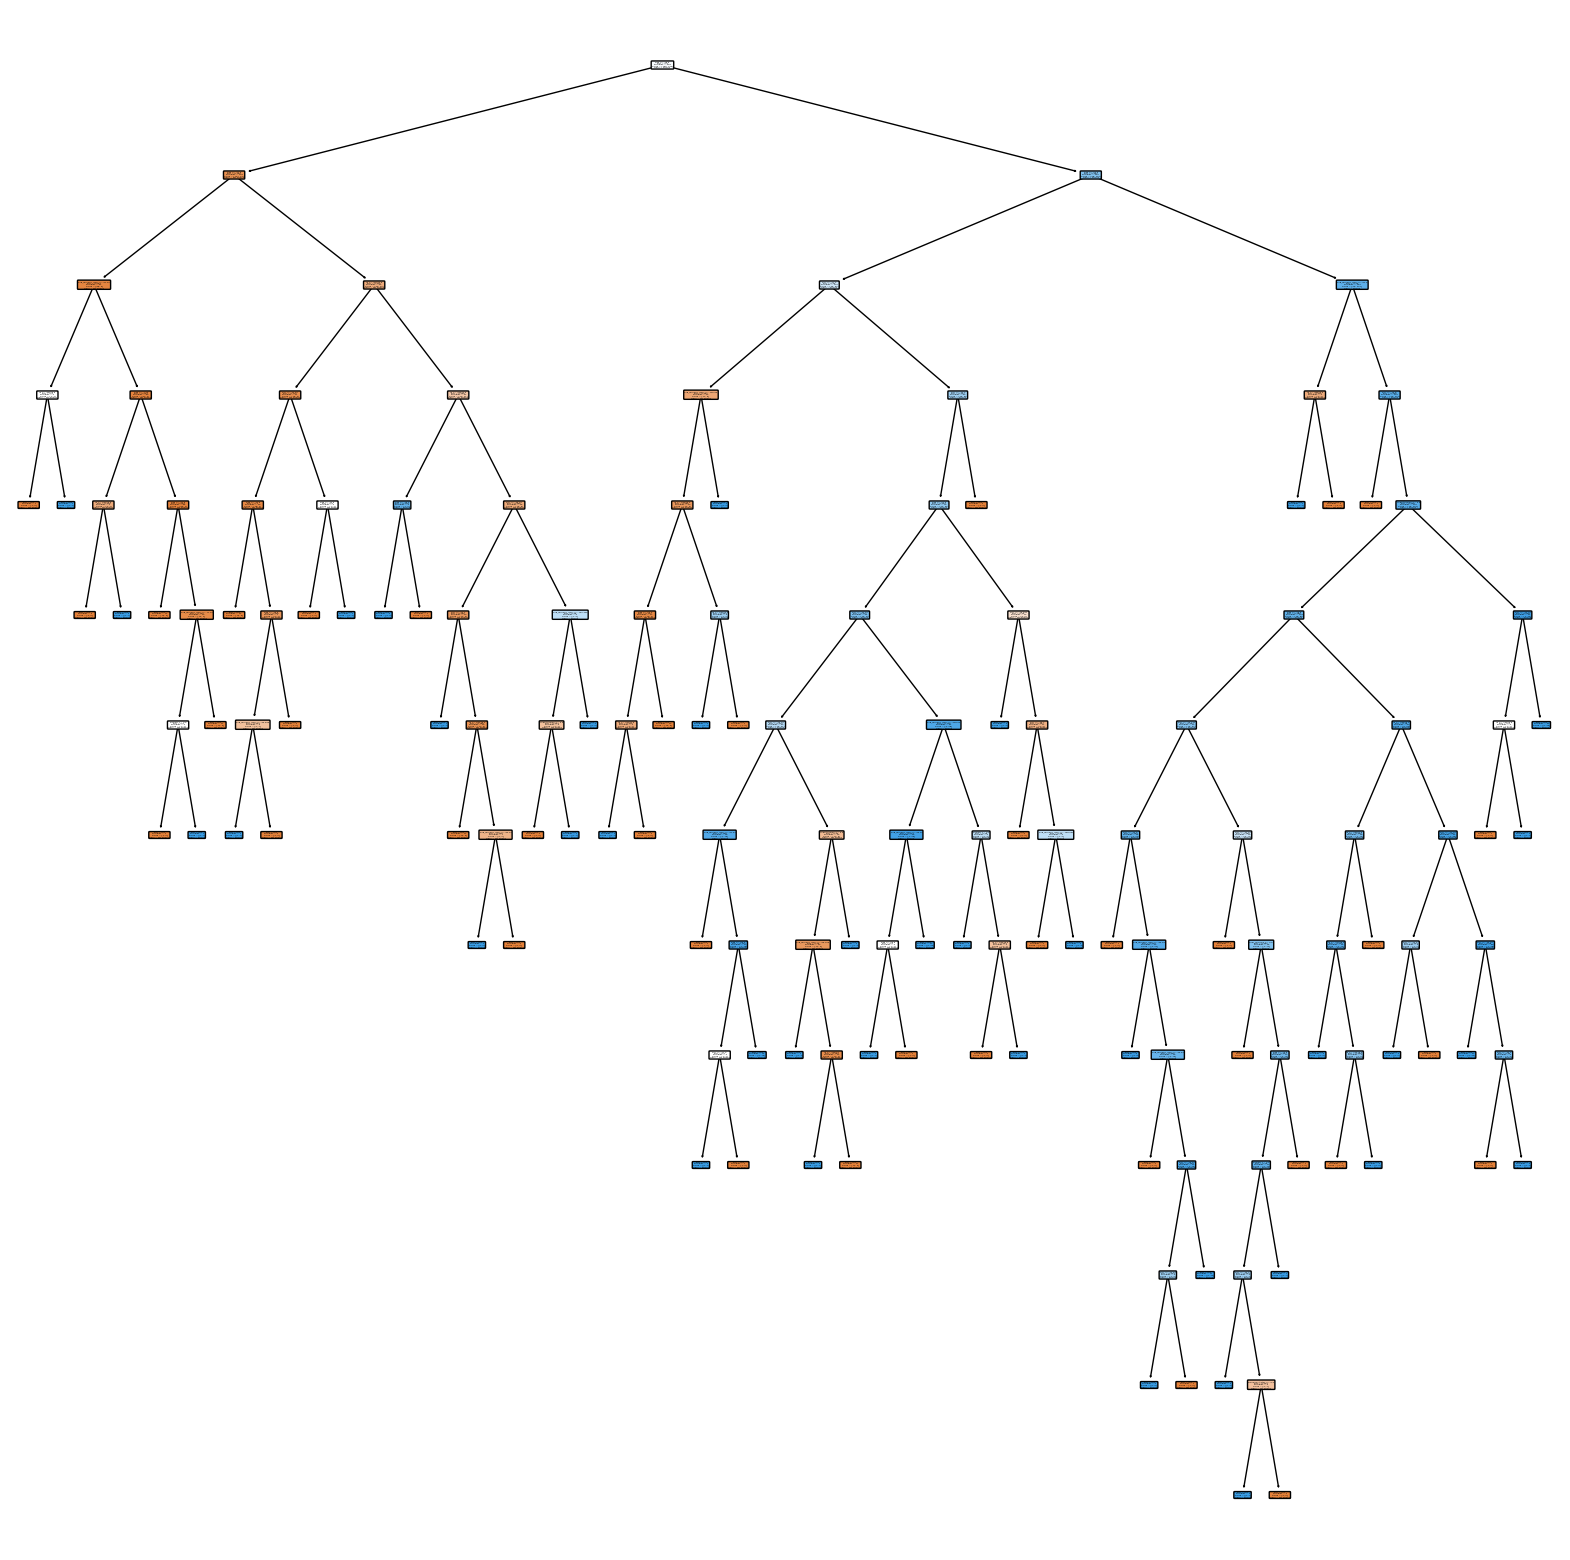

In [14]:
#Decision tree model
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.tree import DecisionTreeClassifier, plot_tree
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train, y_train)

predictions = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

plt.figure(figsize=(20, 20))
plot_tree(dt_classifier, feature_names=final_df.columns, class_names=['No Stroke', 'Stroke'], filled=True, rounded=True)
plt.show()

In [31]:
#Generates pdf of decision tree rules
dot_data = export_graphviz(
    dt_classifier,
    out_file=None,
    feature_names=final_df.columns.drop('stroke'),
    class_names=['No Stroke', 'Stroke'],
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.render("decision_tree")
graph.view("decision_tree")

'decision_tree.pdf'